In [1]:
import numpy as np
import pandas as pd
import statsmodels.distributions.empirical_distribution as empirical
import matplotlib.pyplot as plt
%matplotlib inline
import random
from sklearn import linear_model

In [2]:
NUM_TEAMS = 30
LINEUP_SIZE = 5
TEAM_SIZE = 10
NUM_PLAYERS = NUM_TEAMS * TEAM_SIZE
MIN_CUTOFF = 0

In [3]:
players = pd.read_csv('data/all-players-2018.csv', usecols=['Player','MP','PTS'])

In [4]:
players['Player'] = players['Player'].map(lambda name: name[0:name.find('\\')])

In [5]:
players

,Player,MP,PTS
0,David Stockton,9,40.0
1,Edmond Sumner,2,36.0
2,James Harden,2551,30.9
3,Vince Hunter,7,30.9
4,Jonathan Gibson,40,30.6
5,Stephen Curry,1631,29.7
6,Anthony Davis,2727,27.9
7,Kevin Durant,2325,27.7
8,Kyrie Irving,1931,27.3
9,Joel Embiid,1912,27.2


In [6]:
pts = sorted(players['PTS'].values)
pts_sampler = empirical.monotone_fn_inverter(empirical.ECDF(pts, side='left'), pts)
mp = sorted(players['MP'].values)
mp_sampler = empirical.monotone_fn_inverter(empirical.ECDF(mp, side='left'), mp)

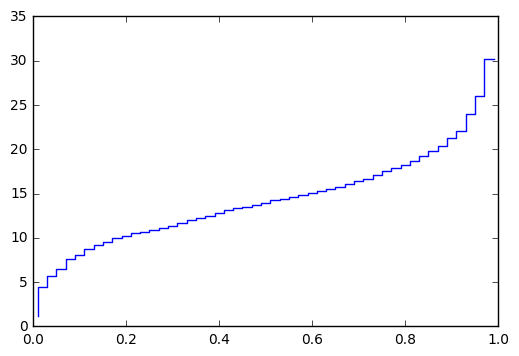

In [7]:
x = np.linspace(0.01,0.99)
y = pts_sampler(x)
plt.step(x, y)

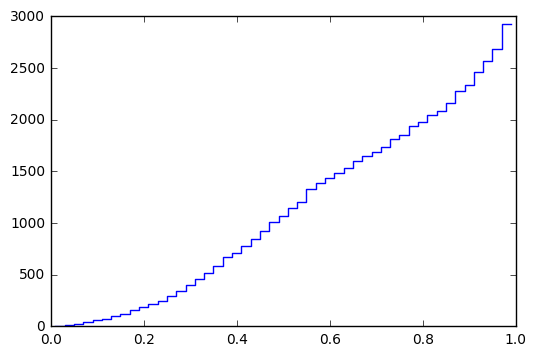

In [8]:
x = np.linspace(0.01,0.99)
y = mp_sampler(x)
plt.step(x, y)

In [9]:
player_names = players['Player'][:]
np.random.shuffle(player_names)
fake_player_names = player_names[0:NUM_PLAYERS]
fake_player_mp = map(lambda x: mp_sampler(x), np.random.uniform(0.01, 0.99, NUM_PLAYERS))
fake_player_pts = map(lambda x: pts_sampler(x), np.random.uniform(0.01, 0.99, NUM_PLAYERS))
fake_player_id = np.arange(0,NUM_PLAYERS)
fake_player_chem = np.random.normal(0, 1, (NUM_PLAYERS))

In [10]:
fake_players = pd.DataFrame({ 'id': fake_player_id, 'names': fake_player_names, 'mp': fake_player_mp, 'pts': fake_player_pts, 'chem': fake_player_chem})

In [11]:
teams = [fake_players[i:i+TEAM_SIZE] for i in xrange(0, NUM_PLAYERS, TEAM_SIZE)]

In [12]:
for i in range(0,NUM_TEAMS):
    print("Team %d\tPTS %f\tChemistry %f" % (i, np.dot(np.array(teams[i].pts).T, np.array(teams[i].mp)) / teams[i].mp.sum(), np.dot(np.array(teams[i].chem).T, np.array(teams[i].mp)) / teams[i].mp.sum()))

Team 0	PTS 14.518567	Chemistry -0.117069
Team 1	PTS 13.748765	Chemistry 0.037814
Team 2	PTS 18.243136	Chemistry 0.579224
Team 3	PTS 10.028327	Chemistry -0.329326
Team 4	PTS 11.980728	Chemistry -1.049362
Team 5	PTS 14.145528	Chemistry 0.274562
Team 6	PTS 12.322951	Chemistry 0.349360
Team 7	PTS 13.726529	Chemistry -0.421428
Team 8	PTS 14.376236	Chemistry -0.250054
Team 9	PTS 11.456385	Chemistry 0.275384
Team 10	PTS 12.587753	Chemistry -0.008947
Team 11	PTS 16.161004	Chemistry -0.095770
Team 12	PTS 13.976993	Chemistry -0.343828
Team 13	PTS 15.126327	Chemistry 0.330799
Team 14	PTS 13.333061	Chemistry -0.468409
Team 15	PTS 13.228796	Chemistry 0.175546
Team 16	PTS 13.008859	Chemistry -0.447861
Team 17	PTS 13.102249	Chemistry -0.959901
Team 18	PTS 13.504971	Chemistry 0.314701
Team 19	PTS 15.483566	Chemistry -0.131425
Team 20	PTS 17.162494	Chemistry -0.028603
Team 21	PTS 14.367043	Chemistry 0.368726
Team 22	PTS 11.893697	Chemistry 0.531792
Team 23	PTS 11.035665	Chemistry -0.016020
Team 24	PTS 

In [13]:
def play(away, home, minutes):
    h_lineup = range(0,LINEUP_SIZE)
    a_lineup = range(0,LINEUP_SIZE)
    h_total = 0
    a_total = 0
    time = 0
    entries = []
    while time < minutes:
        lineup_time = 100
        while(lineup_time > 10 or lineup_time <= 2):
             lineup_time = math.ceil(np.random.exponential(5))
        home_pts = home.iloc[h_lineup].pts.sum()
        away_pts = away.iloc[a_lineup].pts.sum()
        home_chem = 2 ** ((home.iloc[h_lineup].chem).sum() / (LINEUP_SIZE))
        away_chem = 2 ** ((away.iloc[a_lineup].chem).sum() / (LINEUP_SIZE))
#         print("Chem multipliers: %f, %f" % (home_chem, away_chem))
        
        home_score = math.ceil((home_pts / 36) * home_chem * lineup_time * np.random.normal(1, 0.05) * 5 / LINEUP_SIZE)
        away_score = math.ceil((away_pts / 36) * away_chem * lineup_time * np.random.normal(1, 0.05) * 5 / LINEUP_SIZE)       
        score_diff = home_score - away_score
        
        home_ids = '-'.join(map(str, sorted(home.iloc[h_lineup].id.values)))
        away_ids = '-'.join(map(str, sorted(away.iloc[a_lineup].id.values)))
        home_lineup_id = -1
        away_lineup_id = -1
        if home_ids in team_dict:
            home_lineup_id = team_dict.get(home_ids)
        else:
            home_lineup_id = len(team_dict)
            team_dict[home_ids] = home_lineup_id
        if away_ids in team_dict:
            away_lineup_id = team_dict.get(away_ids)
        else:
            away_lineup_id = len(team_dict)
            team_dict[away_ids] = away_lineup_id
        
        h_total += home_score
        a_total += away_score

        entries.append({'home_lineup_id': home_lineup_id, 'away_lineup_id': away_lineup_id, 'score_diff': home_score - away_score, 'lineup_time': lineup_time})
    
        if(random.random() > 0.5):
            bench = [x for x in range(0,TEAM_SIZE) if x not in h_lineup]
            bench_mp = home.iloc[bench].mp.values
            bench_mp /= float(bench_mp.sum())
            sub_in = np.random.choice(bench, 1, p=map(float, bench_mp))[0]
            
            random.shuffle(h_lineup)
            
            h_lineup = h_lineup[0:LINEUP_SIZE-1]
            h_lineup.append(sub_in)
            h_lineup = sorted(h_lineup)
        else:
            bench = [x for x in range(0,TEAM_SIZE) if x not in a_lineup]
            bench_mp = away.iloc[bench].mp.values
            bench_mp /= float(bench_mp.sum())
            sub_in = np.random.choice(bench, 1, p=map(float, bench_mp))[0]
            
            random.shuffle(a_lineup)
            
            a_lineup = a_lineup[0:LINEUP_SIZE-1]
            a_lineup.append(sub_in)
            a_lineup = sorted(a_lineup)
        
        time += lineup_time
    
    print("%s %d - %d" % (('AWAY' if a_total > h_total else 'HOME'), a_total, h_total))
    return entries
        
            

In [14]:
team_dict = dict()
all_results = []
for i in range(0, NUM_TEAMS):
    for j in range(0, NUM_TEAMS):
        if i == j:
            continue
        print("Team %d @ Team %d" % (i, j))
        all_results += play(teams[i], teams[j], 48)

Team 0 @ Team 1
AWAY 113 - 91
Team 0 @ Team 2
HOME 102 - 153
Team 0 @ Team 3
AWAY 128 - 71
Team 0 @ Team 4
AWAY 102 - 56
Team 0 @ Team 5
AWAY 107 - 100
Team 0 @ Team 6
AWAY 115 - 112
Team 0 @ Team 7
AWAY 125 - 65
Team 0 @ Team 8
HOME 121 - 136
Team 0 @ Team 9
AWAY 115 - 89
Team 0 @ Team 10
AWAY 116 - 104
Team 0 @ Team 11
HOME 115 - 129
Team 0 @ Team 12
HOME 101 - 122
Team 0 @ Team 13
HOME 117 - 153
Team 0 @ Team 14
AWAY 112 - 108
Team 0 @ Team 15
HOME 115 - 121
Team 0 @ Team 16
AWAY 103 - 50
Team 0 @ Team 17
AWAY 126 - 59
Team 0 @ Team 18
AWAY 120 - 114
Team 0 @ Team 19
AWAY 119 - 102
Team 0 @ Team 20
HOME 112 - 121
Team 0 @ Team 21
AWAY 145 - 121
Team 0 @ Team 22
AWAY 120 - 72
Team 0 @ Team 23
AWAY 119 - 106
Team 0 @ Team 24
AWAY 128 - 59
Team 0 @ Team 25
AWAY 112 - 82
Team 0 @ Team 26
AWAY 131 - 106
Team 0 @ Team 27
HOME 101 - 155
Team 0 @ Team 28
HOME 99 - 127
Team 0 @ Team 29
AWAY 115 - 97
Team 1 @ Team 0
HOME 106 - 122
Team 1 @ Team 2
HOME 98 - 157
Team 1 @ Team 3
AWAY 115 - 77
Te

In [15]:
all_results

[{'away_lineup_id': 1,
  'home_lineup_id': 0,
  'lineup_time': 9.0,
  'score_diff': -2.0},
 {'away_lineup_id': 1,
  'home_lineup_id': 2,
  'lineup_time': 4.0,
  'score_diff': -2.0},
 {'away_lineup_id': 3,
  'home_lineup_id': 2,
  'lineup_time': 10.0,
  'score_diff': -7.0},
 {'away_lineup_id': 1,
  'home_lineup_id': 2,
  'lineup_time': 3.0,
  'score_diff': -1.0},
 {'away_lineup_id': 1,
  'home_lineup_id': 4,
  'lineup_time': 8.0,
  'score_diff': -4.0},
 {'away_lineup_id': 1,
  'home_lineup_id': 5,
  'lineup_time': 7.0,
  'score_diff': -5.0},
 {'away_lineup_id': 6,
  'home_lineup_id': 5,
  'lineup_time': 8.0,
  'score_diff': -1.0},
 {'away_lineup_id': 1,
  'home_lineup_id': 7,
  'lineup_time': 6.0,
  'score_diff': 6.0},
 {'away_lineup_id': 8,
  'home_lineup_id': 7,
  'lineup_time': 7.0,
  'score_diff': 7.0},
 {'away_lineup_id': 8,
  'home_lineup_id': 9,
  'lineup_time': 4.0,
  'score_diff': 5.0},
 {'away_lineup_id': 8,
  'home_lineup_id': 10,
  'lineup_time': 3.0,
  'score_diff': 4.0},
 

In [16]:
lineup_lookup = {v:k  for k,v in team_dict.items()}

In [17]:
def get_lineup_pts_sum(id):
    ids = map(int, lineup_lookup[id].split('-'))
    return fake_players.iloc[ids].pts.sum()

In [18]:
def get_lineup_chem_sum(id):
    ids = map(int, lineup_lookup[id].split('-'))
    return fake_players.iloc[ids].chem.sum()

In [19]:
def total_play_time(id):
    sum = 0
    for result in all_results:
        if result['home_lineup_id'] == id or result['away_lineup_id'] == id:
            sum += result['lineup_time']
    return sum

In [20]:
def lineups_by_player(id):
    lineups = []
    for lineup in range(0, num_lineups):
        if id in map(int, lineup_lookup[lineup].split('-')):
                lineups.append(lineup)
    return lineups

In [21]:
num_results = len(all_results)
num_lineups = len(team_dict)
A = np.zeros((num_results, num_lineups))
b = np.zeros(num_results)

for idx, val in enumerate(all_results): 
    A[idx][val['home_lineup_id']] = val['lineup_time']
    A[idx][val['away_lineup_id']] = -1 * val['lineup_time']
#     A[idx][num_lineups] = val['lineup_time']
    b[idx] = val['score_diff']

In [36]:
num_results

8064

In [37]:
num_lineups

2567

In [22]:
t = np.linalg.lstsq(A, b, 0.1)[0]

In [23]:
t_sorted = np.argsort(t)

array([[ 1.        ,  0.35240041],
       [ 0.35240041,  1.        ]])

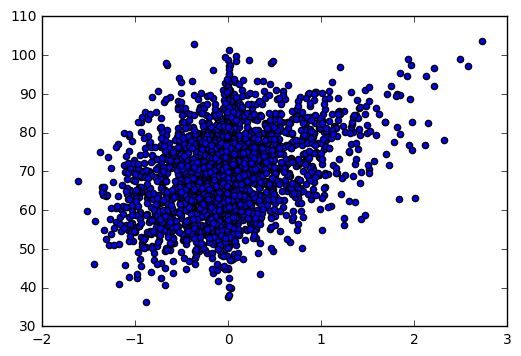

In [24]:
_x = t
_y = map(get_lineup_pts_sum, range(0, num_lineups))
plt.scatter(_x, _y)
np.corrcoef(_x, _y)

0.29528632645111025

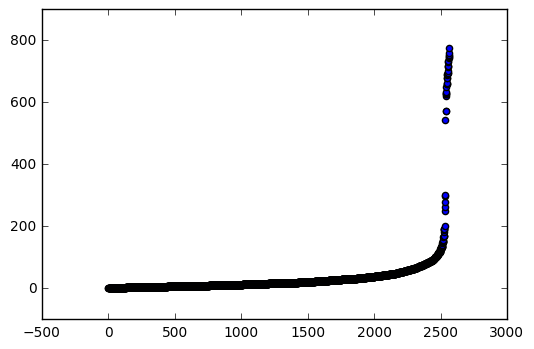

In [25]:
lineup_play_time = map(total_play_time, t_sorted)
_x = range(0,num_lineups)
_y = sorted(map(total_play_time, range(0, num_lineups)))
plt.scatter(_x, _y)
_y.index(10) / float(len(_y))

array([[ 1.        ,  0.35240041],
       [ 0.35240041,  1.        ]])

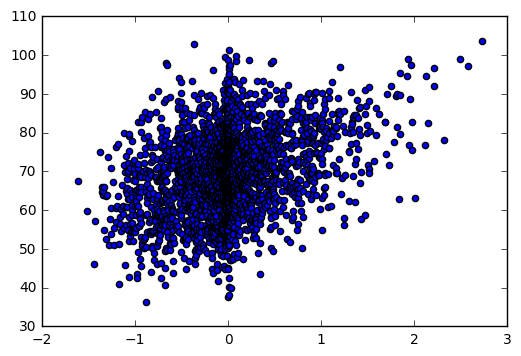

In [26]:
t_sorted_min_r = filter(lambda t: lineup_play_time[t] > MIN_CUTOFF, t_sorted)
available_lineups = len(t_sorted_min_r)
_x = t[t_sorted_min_r]
_y = map(get_lineup_pts_sum, t_sorted_min_r)
plt.figure(20)
plt.scatter(_x, _y)
np.corrcoef(_x, _y)

/usr/local/Cellar/python/2.7.11/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


(-2, 2.5)

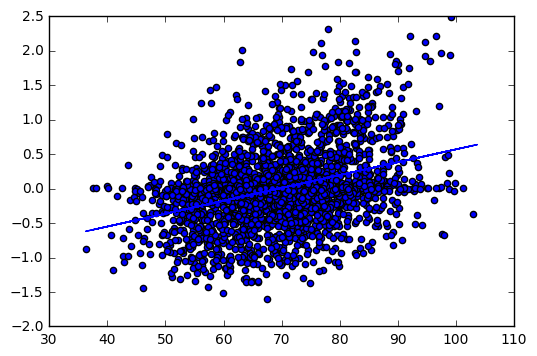

In [27]:
X_pts = np.array(map(get_lineup_pts_sum, range(0, num_lineups))).reshape(num_lineups, 1)
y_str = t.reshape(num_lineups)
pts_regressor = linear_model.LinearRegression()
pts_regressor.fit(
    X_pts,
    y_str
)
plt.scatter(X_pts,  y_str)
plt.plot(X_pts, pts_regressor.predict(X_pts))
axes = plt.gca()
axes.set_ylim([-2,2.5])

array([[ 1.        ,  0.70605652],
       [ 0.70605652,  1.        ]])

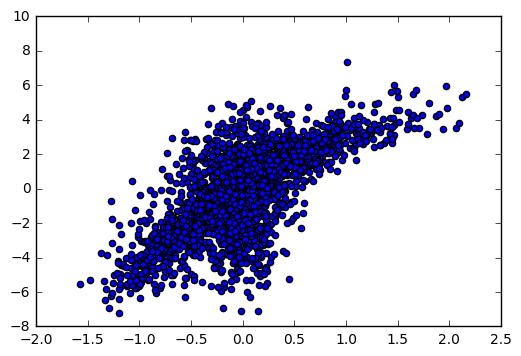

In [28]:
residuals = y_str - pts_regressor.predict(X_pts)
chems = map(get_lineup_chem_sum, range(0, num_lineups))
plt.scatter(residuals, chems)
np.corrcoef(residuals, chems)

In [29]:
def get_lineup_residual(id):
    tt_hat = pts_regressor.predict(get_lineup_pts_sum(id))
    tt = t[id]
    return tt - tt_hat

array([[ 1.        ,  0.53546872],
       [ 0.53546872,  1.        ]])

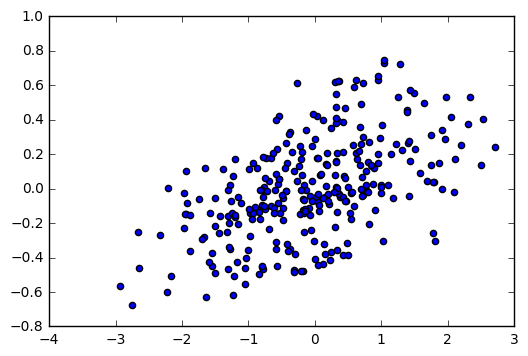

In [30]:
valid_players = filter(lambda p: len(lineups_by_player(p)) > 0, range(0, NUM_PLAYERS))
in_lineups = map(lineups_by_player, valid_players)
lineup_avg_residual = map(lambda ls: sum(map(get_lineup_residual, ls))[0] / len(ls), in_lineups)
player_chems = fake_players.iloc[valid_players].chem.values
plt.scatter(player_chems, lineup_avg_residual)
np.corrcoef(player_chems, lineup_avg_residual)

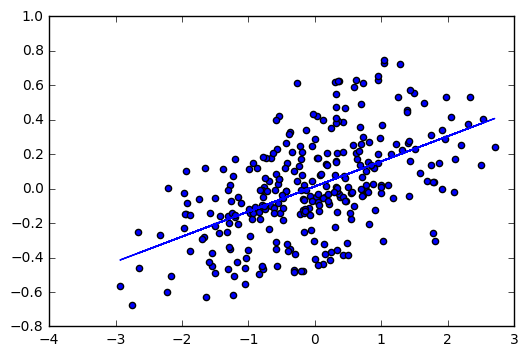

In [31]:
X_chem = np.array(player_chems).reshape(-1, 1)
y_res = np.array(lineup_avg_residual).reshape(-1, 1)
chem_regressor = linear_model.LinearRegression()
chem_regressor.fit(
    X_chem,
    y_res
)
plt.scatter(X_chem,  y_res)
plt.plot(X_chem, chem_regressor.predict(X_chem))

In [32]:
chem_pred = np.zeros(NUM_PLAYERS)
for i in range(0, len(valid_players)):
    chem_pred[valid_players[i]] = lineup_avg_residual[i]
chem_pred -= (sum(chem_pred) / NUM_PLAYERS)
chem_pred /= np.std(chem_pred)
fake_players['chem_pred'] = pd.Series(chem_pred, index=fake_players.index)
good_pred = fake_players[fake_players['mp'] > 1000].sort_values('chem_pred', ascending=False)

array([[ 1.        ,  0.58294096],
       [ 0.58294096,  1.        ]])

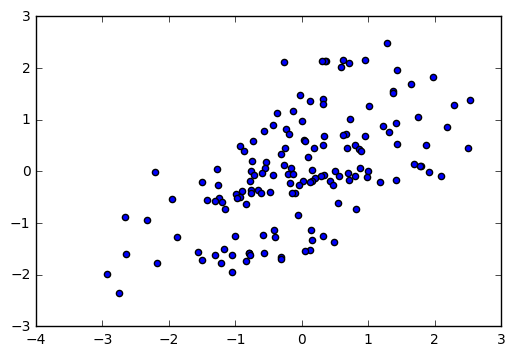

In [33]:
_x = good_pred['chem'].values
_y = good_pred['chem_pred'].values
plt.scatter(_x, _y)
np.corrcoef(_x, _y)

In [34]:
good_pred

,chem,id,mp,names,pts,chem_pred
23,1.284890,23,1485.37083479,Chris Paul,16.8920492112,2.489250
29,0.625265,29,1858.65629324,D'Angelo Russell,16.7842323668,2.165073
22,0.949479,22,2551.82327801,Pau Gasol,23.8427317127,2.157929
21,0.362249,21,1790.78755408,Mangok Mathiang,27.3189980627,2.146570
130,0.350610,130,1462.48089973,J.R. Smith,14.7852502905,2.137355
27,0.299479,27,2061.85123931,Isaiah Whitehead,12.2477120463,2.128785
139,-0.264740,139,1674.22176809,Eric Bledsoe,26.3755780875,2.111524
134,0.716769,134,1971.03517009,Lonzo Ball,6.63139368208,2.096328
28,0.586389,28,1614.07133776,Robert Covington,18.8086025367,2.025987
67,1.431357,67,2260.46624778,Trevor Ariza,19.4186002035,1.972029


(array([  7.,  14.,  23.,  62.,  74.,  49.,  42.,  15.,   6.,   8.]),
 array([  1.50014019,   4.12682267,   6.75350516,   9.38018764,
         12.00687013,  14.63355261,  17.2602351 ,  19.88691758,
         22.51360007,  25.14028256,  27.76696504]),
 <a list of 10 Patch objects>)

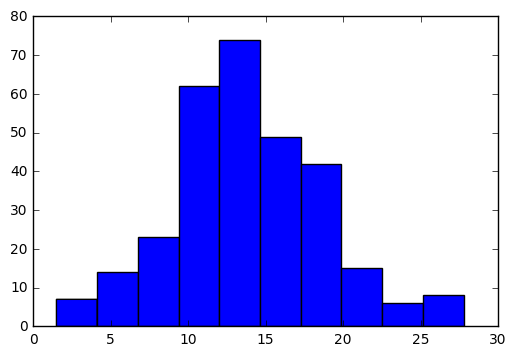

In [35]:
plt.hist(fake_players.pts)

# plt.hist(fake_players.mp)